In [238]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
df = pd.read_csv('Confirmed_VS_Vaccinated_US.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-12-20,76818746.0,0.0
1,2020-12-21,77367360.0,0.0
2,2020-12-22,78016498.0,0.0
3,2020-12-23,78710560.0,0.0
4,2020-12-24,79377452.0,0.0
...,...,...,...
65,2021-02-23,112019890.0,41842414.0
66,2021-02-24,112464430.0,42359354.0
67,2021-02-25,112911535.0,43514673.0
68,2021-02-26,113325717.0,45521878.0


In [240]:
x = np.array(df.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,22):
    list.append(69 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90]])

In [241]:
y_c_train = df.iloc[:,1]
y_v_train = df.iloc[:,-1]
y_v_train

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [242]:
model_v = PolynomialRegressionModel(polynomial_degree=2)
model_v.train(x,y_v_train)

In [243]:
y_v_pred = model_v.get_predictions(x_pred)
y_v_pred

array([47272311, 49005182, 50768694, 52562847, 54387642, 56243079,
       58129157, 60045876, 61993238, 63971241, 65979885, 68019171,
       70089098, 72189667, 74320878, 76482730, 78675224, 80898359,
       83152136, 85436554, 87751614])

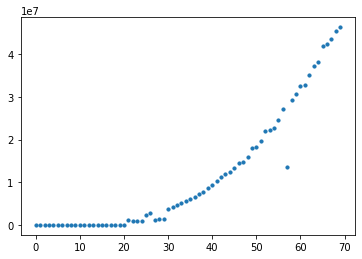

In [244]:
plt.scatter(x, y_v_train, s=10)

In [245]:
df_y = pd.read_csv('02_28_to_03_20_vaccination.csv')
y_v_test = df_y.iloc[:,-1]
y_v_test

0     50217092.0
1     52969506.0
2     52933742.0
3     56283119.0
4     57540294.0
5     58534730.0
6     58056286.0
7     60088698.0
8     63270356.0
9     64762432.0
10    69592914.0
11    73010600.0
12    75600854.0
13    78513026.0
14    77982576.0
15    82336622.0
16    79035899.0
17    90713305.0
18    88548724.0
19    90448901.0
20    81404397.0
Name: People_Fully_Vaccinated, dtype: float64

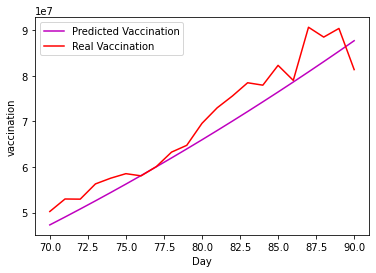

In [246]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

### Get vaccination of 100 days

In [247]:
x = np.array(df.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,200):
    list.append(69 +i)
x_pred = np.array(list).reshape(-1, 1)

In [248]:
model_v = PolynomialRegressionModel(polynomial_degree=2)
model_v.train(x,y_v_train)

In [249]:
y_v_pred = model_v.get_predictions(x_pred)
#y_v_pred

### Train model with features of days and vaccinations 

In [250]:
y_c_train = df.iloc[:,1]
vaccination = df.iloc[:,-1]
vaccination

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [251]:
x_c_train = np.vstack((np.array(df.index.values.tolist()), vaccination)).T
#x_c_train

In [252]:
model_c = PolynomialRegressionModel(polynomial_degree=1)
model_c.train(x_c_train,y_c_train)

In [253]:
x_c_test = np.vstack((np.array(list), y_v_pred)).T
#x_c_test

In [254]:
y_c_pred = model_c.get_predictions(x_c_test)
y_c_pred

array([114165834, 114496764, 114821621, 115140404, 115453114, 115759750,
       116060312, 116354801, 116643217, 116925559, 117201827, 117472022,
       117736144, 117994192, 118246166, 118492067, 118731894, 118965648,
       119193329, 119414936, 119630469, 119839929, 120043315, 120240628,
       120431868, 120617034, 120796126, 120969145, 121136090, 121296962,
       121451760, 121600485, 121743137, 121879714, 122010219, 122134650,
       122253007, 122365291, 122471501, 122571638, 122665701, 122753691,
       122835607, 122911450, 122981219, 123044915, 123102537, 123154086,
       123199561, 123238963, 123272291, 123299546, 123320727, 123335835,
       123344869, 123347830, 123344717, 123335530, 123320270, 123298937,
       123271530, 123238050, 123198496, 123152869, 123101168, 123043393,
       122979545, 122909624, 122833629, 122751561, 122663419, 122569203,
       122468914, 122362552, 122250116, 122131606, 122007024, 121876367,
       121739637, 121596833, 121447957, 121293006, 

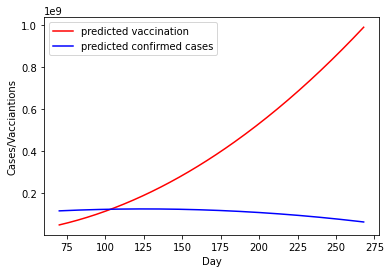

In [255]:
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")
plt.show()